In [ ]:
#THIS IS THE 3rd change 

In [1]:
# Support vector machine --- supervised learning algorithm
# Regression & Classification (primarily used for classification)

# What is all about support vector?

In [2]:
# We will try to create a LINE / HYPERPLANE in n-dimension so that it maximizes the distance 
#between the hyperplane and the closest points. This distance is known margin.
#So SVM is basically a margin maximization algorithm
#The closest points that reside on the margin are called support vectors. 

In [3]:
# What SVM does is in case of non - linear relationship --- it transforms the data to higher
#dimension to find out a linear hyperplane that linearly separates the classes.
# this is known as kernel trick.

# So, SVM uses linear classifier to classify non linera relationship.
    

In [4]:
# Transformation of the data to higher dimension is done by using few functions - 

In [5]:
# 3 main hyperparameter --- 
# What kernel to use for transaformation - LINEAR FUNCTION, POLYNOMIAL, RBF
# If you choose polynomial what order of polynomial do you want to use?
# Penalty parameter makes SUpport vector machine forget outlier values in 
# the margin area.If the penalty parameter is High, then overfitting is high...i.e SVM cannot forget
#the outlier values in building the margin.
#Wherease if C value is low , that means the algorithm has forgotten and my model is less pverfit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris_Data = load_iris()

In [71]:
indep_var = pd.DataFrame(iris_Data['data'],columns=iris_Data.feature_names)

In [73]:
dep_var = pd.DataFrame(iris_Data['target'],columns=['FlowerType'])

In [74]:
full_Data = pd.concat([indep_var,dep_var],axis=1)

In [75]:
X = full_Data.drop('FlowerType',axis=1)
Y = full_Data['FlowerType']

In [78]:
full_Data['FlowerType'].unique()

array([0, 1, 2], dtype=int64)

In [80]:
from sklearn import svm
svc_mod = svm.SVC() # C parameter controls overfitting --- regularization parameter

In [ ]:
# The C parameter tells SVM how much you want to avoid the misclassification
#for large values of C --- means you are telling the algorithm u cannot afford misclassification ... u r okay to have narro margin
#For small values of C ---- you can afford to have miscalssification for the sake of wider margin

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [85]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'C':[0.001,0.01,0.1,0.5,1],
                 'kernel':['rbf','linear']
                 }
gridsearch_svm = GridSearchCV(svc_mod,cv=5,param_grid=parameters_svm,scoring='balanced_accuracy')

In [86]:
gridsearch_svm.fit(X_train,Y_train)

C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='balanced_accuracy', verbose=0)

In [87]:
gridsearch_svm.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [88]:
svc_mod2 = svm.SVC(C=0.5,kernel='linear')
svc_mod2.fit(X_train,Y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [89]:
Y_pred_test = svc_mod2.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred_test)


1.0

In [ ]:
### Neural Network --- WHEN YOUR TRAINING DATA IS HUGE IN SIZE
### XGBOOST --------------WHen you have good amount training data
### SVM ---------------- Is the 3rd best --- it works best if datapoints are less 

In [53]:
demo = pd.DataFrame({'Age':[18,20,25,30,40,45],
                    'Buy':[0,0,1,1,0,0]})

In [54]:
X = demo[['Age']]
Y = demo['Buy']

In [66]:
from sklearn import svm
svc_model = svm.SVC(kernel = 'rbf')
svc_model.fit(X,Y)

C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [67]:
svc_model.predict(X)

array([0, 0, 1, 1, 0, 0], dtype=int64)

In [ ]:
# APART FROM SVM NO OTHER LINEAR MODEL CAN HANDLE NON LINEAR DATA 
# GOOD THING ABOUT SVM IS TWO FOLD - 
# IT HAS VERY LOW VARIANCE
# for new data prediction it only cares about support vectors

In [ ]:
### SVM, NB can u do text classification


In [94]:
### Any text classification problem that we deal with will have following strcuture
# Any high level idea on how to handle text data



In [2]:
import os
file_path = r'C:\Users\Admin\Desktop\Edvancer\PythonClass\Data\Reuters Data'

In [3]:
all_files = os.listdir(file_path)
#all_files

In [4]:
len(all_files)

928

In [5]:
all_text_files = []
for files in all_files:
    if '.txt' in files:
        all_text_files.append(files)

In [6]:
len(all_text_files)

927

In [7]:
label = []
text = []
for f in all_text_files:
    filename = str(f)
    complete_text = []
    file_pointer = open(file_path+"\\"+ f)
    for l in file_pointer.readlines():
        complete_text.append(l.strip())
        #print(complete_text)
    
    text.append(complete_text[0])   
    return_crude = filename.find('crude')
    #print(return_crude)
    if (return_crude == -1):
        label.append('money_fx')
    else:
        label.append('crude')
        

In [8]:
len(text)

927

In [9]:
len(label)

927

In [10]:
text_df = pd.DataFrame({'label':label,
             'text':text})
text_df.head()

,label,text
0,crude,CANADA OIL EXPORTS RISE 20 PCT IN 1986
1,crude,BP &lt;BP> DOES NOT PLAN TO HIKE STANDARD &lt;...
2,crude,BP&lt;BP> OFFER RAISES EXPECTATIONS FOR OIL VA...
3,crude,USX &lt;X> SAYS TALKS ENDED WITH BRITISH PETRO...
4,crude,BP &lt;BP> MAY HAVE TO RAISE BID - ANALYSTS


In [11]:
text_df['label'].value_counts()

money_fx    538
crude       389
Name: label, dtype: int64

In [12]:
Y = (text_df['label'] == 'crude').astype(int)

In [42]:
crude_data = text_df[text_df['label'] == 'crude']

In [71]:
text_df['label'].unique()

array(['crude', 'money_fx'], dtype=object)

In [72]:
money_data =  text_df[text_df['label'] == 'money_fx']

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


In [45]:
crude_data.head()

,label,text
0,crude,CANADA OIL EXPORTS RISE 20 PCT IN 1986
1,crude,BP &lt;BP> DOES NOT PLAN TO HIKE STANDARD &lt;...
2,crude,BP&lt;BP> OFFER RAISES EXPECTATIONS FOR OIL VA...
3,crude,USX &lt;X> SAYS TALKS ENDED WITH BRITISH PETRO...
4,crude,BP &lt;BP> MAY HAVE TO RAISE BID - ANALYSTS


In [66]:
#

(-0.5, 399.5, 199.5, -0.5)

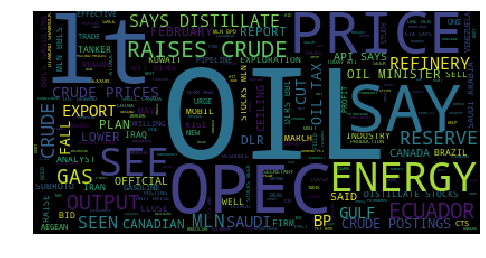

In [68]:
plt.figure(figsize = (8,8))
wc = WordCloud().generate(" ".join(crude_data['text']))
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

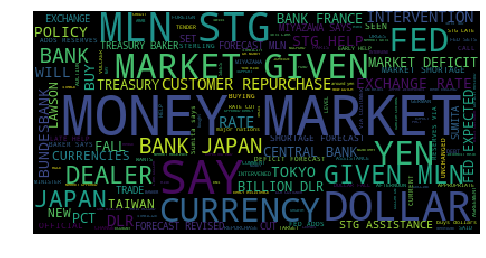

In [73]:
plt.figure(figsize = (8,8))
wc = WordCloud().generate(" ".join(money_data['text']))
plt.imshow(wc)
plt.axis('off')

In [264]:
####X = ...
### wewill need to split each of the sentences into words

### TOKENIZATION --- WORDS ARE TOKEN IN A SENTENCE
### We will convert each of the words to its numeric equivalent --- TFIDF
### Then we will be able to do modelling

In [265]:
text_df.to_csv("REUTERS_final_data.csv",index=False)

In [16]:
#Y

In [12]:
############# TEXT DATA PROCESSING #################
#OBJECTIVE - We will break the sentences into words and each of the words will become a feature
# Some of the words are junk words --- that is known as stopwords - remove stopwords -- remove punctiation
# Stemming / Lemmatize -
# Playing , Played, Playful ===> Play , Went, Go ---> Go(Lemmatization)
# going,go ---> go (Stemming) ----> Going, Went ---> Go (Not Stemming)
# played, play --- play (Stemming)
# WOrd inflections are handled through both ---lemmatization is advanced , stemming is a constrained
# Stemming ---- faster ( algorithm)

In [17]:
# DIVIDE THE ENTIRE CORPUS INTO TRAINING AND TEST
from sklearn.model_selection import train_test_split
text_train, text_test = train_test_split(text_df,test_size = 0.2,random_state = 100)

In [18]:
text_train.shape

(741, 2)

In [19]:
text_test.shape

(186, 2)

In [20]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
lemmatization = WordNetLemmatizer()
print(stopwords.words('english'))
from string import punctuation
print(list(punctuation))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
skiplist = stopwords.words('english') + list(punctuation) + ['BP','USX','20','1986',"'s"]

In [22]:
text_train.loc[:,'text'] = text_train.loc[:,'text'].str.lower()
text_test.loc[:,'text'] = text_test.loc[:,'text'].str.lower()

C:\Users\Admin\Anaconda2\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [23]:
word_tokenize("I 'm Utsab and I had a boring weekend!")

['I', "'m", 'Utsab', 'and', 'I', 'had', 'a', 'boring', 'weekend', '!']

In [24]:
def do_preprocess_text(text):
    # Tokenize
    all_words = word_tokenize(text)
    # Stopwordremoval
    stopword_removed_words = []
    for w in all_words:
        if w in skiplist:
            continue
        else:
            stopword_removed_words.append(w)
    # Lemmatize/Stem
    lemmatized_words = []
    for w1 in stopword_removed_words:
        lemmatized_words.append(lemmatization.lemmatize(w1))
    return lemmatized_words
        
        
    
            
        

In [64]:
#from sklearn.feature_extraction.text import CountVectorizer
#text_vectorize_words = CountVectorizer(lowercase = True,stop_words=skiplist,analyzer=do_preprocess_text,min_df=30,max_df=500)
#text_vectorize_words.fit(text_train['text'])
#final_text_vectorized_words = text_vectorize_words.transform(text_train['text'])
#final_text_vectorized_words.to_array()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_v = TfidfVectorizer(lowercase = True,stop_words=skiplist,analyzer=do_preprocess_text,min_df=30,max_df=500)
tf_idf_v.fit(text_train['text'])
final_tfidf_vectorized_words = tf_idf_v.transform(text_train['text'])
#final_tfidf_vectorized_words.to_array()

In [36]:
#pd.DataFrame(final_tfidf_vectorized_words.toarray(),columns=tf_idf_v.get_feature_names())

In [37]:
feature_train_df = pd.DataFrame(final_tfidf_vectorized_words.toarray(),columns=tf_idf_v.get_feature_names())

In [38]:
feature_train_df.shape

(741, 22)

In [39]:
feature_train_df.head()

,bank,crude,currency,dlr,dollar,fed,given,help,japan,lt,...,money,oil,price,rate,reserve,say,stg,u.k.,u.s.,yen
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.49795,0.0,0.0,0.0,...,0.354404,0.0,0.0,0.000000,0.0,0.0,0.438325,0.387749,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0
2,0.661352,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.750076,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.561449,0.0,0.0,0.000000,0.0,0.0,0.000000,0.614274,0.0,0.0


In [40]:
final_ifidf_vectorized_words_test = tf_idf_v.transform(text_test['text'])
feature_test_df = pd.DataFrame(final_ifidf_vectorized_words_test.toarray(),columns=tf_idf_v.get_feature_names())
feature_test_df.head()

,bank,crude,currency,dlr,dollar,fed,given,help,japan,lt,...,money,oil,price,rate,reserve,say,stg,u.k.,u.s.,yen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
target_train = (text_train['label'] == 'crude').astype(int)
target_test = (text_test['label'] == 'crude').astype(int)

In [67]:
from sklearn import svm
svc_model = svm.SVC(kernel = 'rbf')
svc_model.fit(feature_train_df,target_train)

C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
pred_test = svc_model.predict(feature_test_df)

In [69]:
pred_test

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test,pred_test)

0.8440860215053764

In [71]:
from sklearn.naive_bayes import MultinomialNB   # For text data for naive bayes use Multinomial NB
mnb = MultinomialNB()
mnb.fit(feature_train_df,target_train)
pred_test_mnb = mnb.predict(feature_test_df)
accuracy_score(target_test,pred_test_mnb)

0.8602150537634409

In [227]:
fp = open(r'C:\Users\Admin\Desktop\Edvancer\PythonClass\Data\Reuters Data\training_money-fx_1983.txt')

In [228]:
text = []
for l in fp:
    if l.strip()!="":
        print("".join(l.strip()))


EGYPTIAN CENTRAL BANK DOLLAR RATE UNCHANGED
Egypt's Central Bank today set the dollar
rate for commercial banks for March 6 at 1.373/87 dollars,
unchanged from the previous rate.


In [72]:
#!pip install nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()
list_f_words = ['play','playing','playful','played','plays']
for w in list_f_words:
    rootword = ps.stem(w)
    print(rootword)

play
play
play
play
play


In [75]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
list_f_words = ['went','go','goes','going']
for w in list_f_words:
    rootword = ps.stem(w)
    print(rootword)

went
go
goe
go


In [80]:
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
list_f_words = ['went','go','goes','going','gone']
for w in list_f_words:
    rootword = wl.lemmatize(w,pos ='v')
    print(rootword)

go
go
go
go
go
